## Atelier1: Classification


### Contexte: 
Nous souhaitons mettre en place un modèle approprié permettant d'identifier le public cible pour une publicité spécifique sur l'un des réseaux sociaux, maximisant ainsi le taux de clics sur cette publicité.
### Description du Dataset
Notre Dataset 'Internautes_info.csv' contient des informations sur tous les utilisateurs du réseau social, y compris leur Identifiant, leur sexe, leur âge et leur salaire estimé. La dernière colonne de l'ensemble de données est un vecteur de booléens décrivant si chaque utilisateur a fini par cliquer sur la publicité (0 = Faux, 1 = Vrai).

### Importer les libraries

In [1]:
# Importer les libraries
#For numerical libraries
import numpy as np

#To handle data in the form of rows and columns
import pandas as pd

#importing seaborn for statistical plots
import seaborn as sns

#importing ploting libraries
import matplotlib.pyplot as plt

#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

#To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing the Encoding library
from sklearn.preprocessing import LabelEncoder

# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

#Import Decision Tree Classifier machine learning Library
from sklearn.tree import DecisionTreeClassifier


#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Import the metrics
from sklearn import metrics

#Import the Voting classifier for Ensemble
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Importer le dataset

In [2]:
# Importer le dataset
internautes_data=pd.read_csv('Internautes_info.csv')

### dimensions : nombre de lignes, nombre de colonnes

In [3]:
#dimensions : nombre de lignes, nombre de colonnes
internautes_data.shape

(400, 5)

### Visualiser les 5 premiers

In [4]:
#Visualiser les 5 premiers
internautes_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Diviser les données en attributs et étiquettes (labels)

In [5]:
# Convertion des variables catégorielles en données numériques
labelencoder_X = LabelEncoder()
internautes_data['Gender']=labelencoder_X.fit_transform(internautes_data['Gender'])
internautes_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [6]:
# Supression de la colonne USER ID
internautes_data = internautes_data.drop("User ID", axis=1)
# diviser les données en attributs et étiquettes (labes)
X=internautes_data.loc[:,internautes_data.columns!='Purchased']
Y=internautes_data.loc[:,internautes_data.columns=='Purchased']
#Y = internautes_data['Purchased']
#X = internautes_data[['Gender', 'Age', 'EstimatedSalary']]

### Exploration des données (statistiques et visuelles)

In [7]:
# Vérifier et supprimer les données sont duppliqués
sum_dup = internautes_data.duplicated().sum()
print('Nombre de dupplication : ' + str(sum_dup))

Nombre de dupplication : 20


In [8]:
# Vérifier s'il existe des valeurs nulles
internautes_data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
# Analyse descriptive du dataset
internautes_data[['Age', 'EstimatedSalary']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.655,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.500,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0


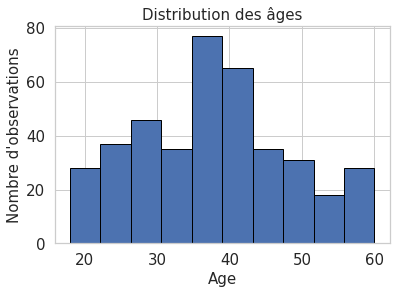

In [10]:
# Consulter la distribution par âge
plt.hist(internautes_data['Age'], bins=10, edgecolor='black')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Nombre d\'observations', fontsize=15)
plt.title('Distribution des âges', fontsize=15)
# plt.show()
plt.tick_params(labelsize=15)

/home/yannis/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


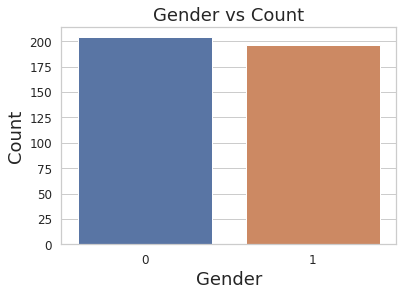

In [11]:
# Consulter la distribution par genre
sns.countplot(internautes_data['Gender'],data=internautes_data)
plt.rcParams["figure.figsize"] = (18,12)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Gender vs Count', fontsize=18)
plt.tick_params(labelsize=12)

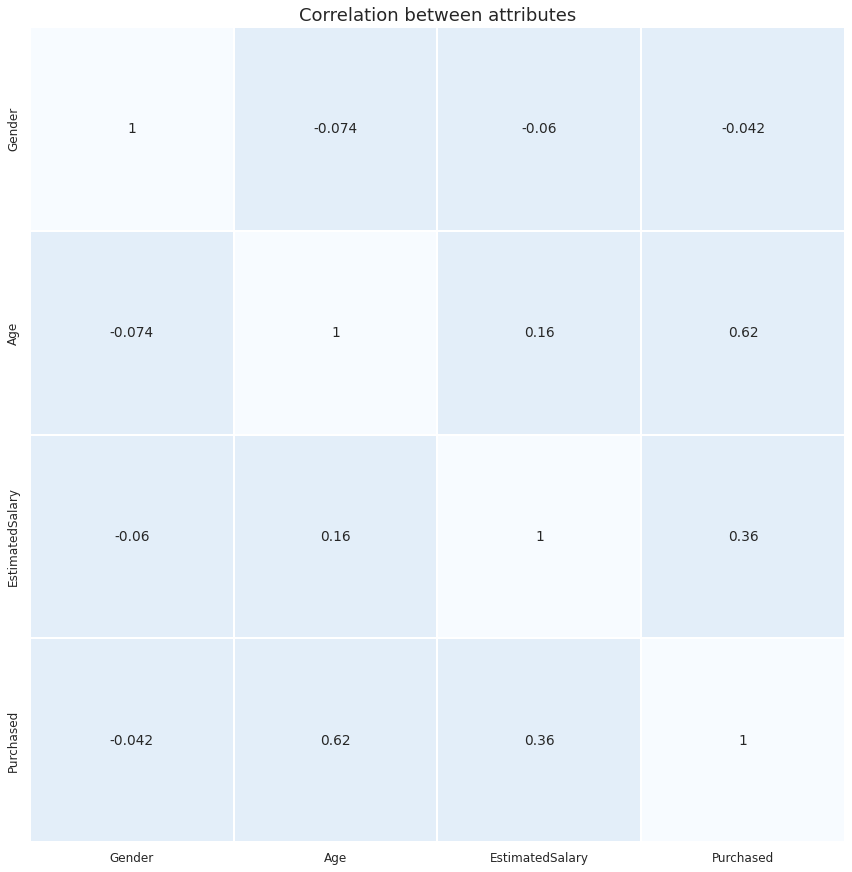

In [12]:
# Graphique de correlation 
# correlation plot---heatmap
cor=internautes_data.corr()
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,vmin=0.8,cmap='Blues_r', annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=12)

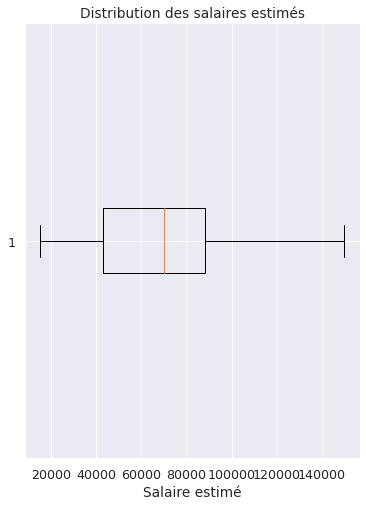

In [13]:
# Boxplot sur EstimatedSalary
plt.figure(figsize=(6, 8))
plt.boxplot(internautes_data['EstimatedSalary'], vert=False)
plt.title('Distribution des salaires estimés')
plt.xlabel('Salaire estimé')
plt.show()


### Splitting du dataset Training set and Test set (80%,20%)

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
columns=X_train.columns
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 320 rows
Test Set: 80 rows


### Feature Scaling (if require)


In [15]:
# Non necessaire

### Fitting Logistic Regression to the Training set

In [16]:
# Création d'une instance du modèle
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

/home/yannis/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### on souhaite comparer les valeurs des métriques Accuracy et précision pour les algorithmes LogisticRegression , KNN, SVM et arbres de décision 


###### Métriques avec LogisticRegression

In [17]:
# Faire les prédictions sur l'ensemble de test
predictions1 = model1.predict(X_test)
# On compare les résultats prédit par le modèle avec les vrais labels de l'ensemble de test 
print(classification_report(Y_test,predictions1))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80



/home/yannis/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yannis/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yannis/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Métriques avec un arbre de décision

In [18]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=10)
model2.fit(X_train, Y_train)
predictions2 = model2.predict(X_test)
print(classification_report(Y_test,predictions2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.83      0.91      0.87        22

    accuracy                           0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



###### Métriques avec KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        58
           1       0.60      0.68      0.64        22

    accuracy                           0.79        80
   macro avg       0.74      0.75      0.74        80
weighted avg       0.80      0.79      0.79        80



/home/yannis/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


###### Métriques avec SVM

In [20]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import accuracy_score

# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# Créer une SVM avec un noyau gaussien de paramètre gamma=0.01
classifier = svm.SVC(kernel='rbf', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, Y_train)


# Prédire les étiquettes pour les données de test
Y_pred = classifier.predict(X_test_std)

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



/home/yannis/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
